# Enhancing Spotify User Experience Through Data-Driven Insights

This exploratory data analysis's (EDA) main goal is to extract useful information from Spotify's large dataset, which includes a range of musical characteristics. Through improved playlist curation, improved music recommendation algorithms, and user-specific marketing methods, this analysis seeks to maximise the Spotify user experience.

##### Those who are included in this analysis are as follows:
- Product Managers at Spotify are accountable for enhancing the functionality of the music streaming platform as well as the level of user engagement at the platform.
- Marketing teams at Spotify need to have an understanding of user preferences in order to develop ads that are more focused.
- Teams inside Spotify that are responsible for data science and analytics and require deep insights in order to improve data-driven decision-making processes and develop algorithms.

##### Audience should do:
- Product managers: Use what you've learnt to make features that make interacting with your users better, like smarter music suggestions and more interesting user interfaces.
- Marketing Teams: Use the results to make personalised marketing efforts that reach different groups of users based on the songs they like.
- Data Scientist: Use the data to make the backend algorithms that make music suggestions, genre classifications, and mood-based mix curation better.

## DATA EXPLORATION

In [146]:
import pandas as dp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
# Load the dataset
df = pd.read_csv('/Users/prerna/Downloads/SpotifyFeatures.csv')

# Check for missing values and data types
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


### Checking for duplicates 

In [147]:
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

Duplicate rows: 0


### Outlier Detection

In [149]:
numeric_cols = ['tempo', 'loudness', 'energy']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [46]:
# Remove outliers 
Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['tempo'] >= (Q1 - 1.5 * IQR)) & (df['tempo'] <= (Q3 + 1.5 * IQR))]

The df will now only contain rows where the tempo values fall within the acceptable range, without extreme low or high outlier values.

### Standardizing Genre Labels

In [47]:
# Example of genre standardization
df['genre'] = df['genre'].str.lower().replace({'hip hop':'hip-hop', 'r&b':'rnb'})

We have normalize genre names by fixing inconsistencies in spelling or categorizing overly specific sub-genres into broader, standardized categories. As 'hip hop' to 'hip-hop' and 'r&b' to 'rnb'.


### Feature engineering

In [48]:
# Feature engineering: converting milliseconds to minutes
df['duration_min'] = df['duration_ms'] / 60000

Here we created additional columns or adjust existing features to improve the quality of analysis. For example, if duration_ms is provided, we might convert it to minutes for easier interpretation.

## EDA PIPELINE 

## 1. Top 10 Genres by Average Popularity

### Business Imortance
Businesses can improve user engagement by focussing on what people appreciate by knowing which genres are most popular. Songs from popular genres can purchased and promoted by platforms to increase user retention and happiness. To boost awareness and growth, businesses should carefully collaborate with artists, brands, and events that fit in with popular genres.

By identifying the most popular genres, Spotify can improve, recommendation systems, create playlists that are trending, and adjust its marketing tactics to better suit its user base.

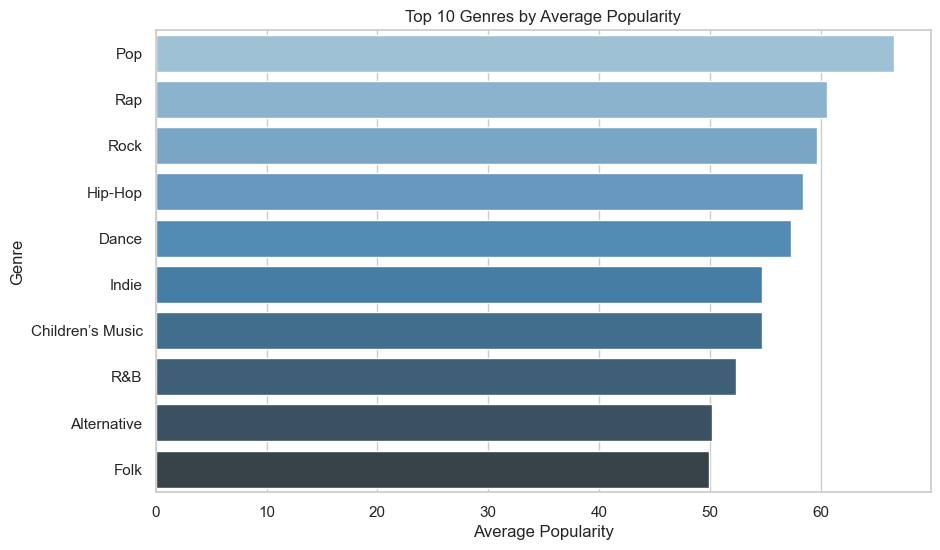

In [154]:
# Calculate average popularity per genre
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

# Visualize the top 10 genres
plt.figure(figsize=(10,6))
sns.barplot(x=genre_popularity.head(10).values, y=genre_popularity.head(10).index, palette='Blues_d')
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()


### Explanation
This bar chart shows the top 10 most popular genres based on their average popularity score. As focusing on these genres, Spotify can better promote artists and tracks from these categories, increase engagement, and possibly attract new listeners. An interesting finding is whether mainstream genres like pop dominate or other genres also perform well.

## 2. Duration of song across different genres

### Business Importance
Spotify can optimize user experience by recommending content with appropriate song lengths based on user behavior like preferring shorter songs for commuting and longer songs for relaxing.
This data can be useful for artists and record labels showing trends in song lengths within certain genres helping them align with listener expectations. 

In [103]:
# Sort the DataFrame by 'duration_ms' in descending order for the bar plot
df_sorted = df[["genre","duration_ms"]].groupby("genre").sum().sort_values("duration_ms", ascending =False).reset_index()


In [104]:
df_sorted

,genre,duration_ms
0,classical,2871606688
1,world,2866544739
2,electronic,2522551904
3,jazz,2506902823
4,comedy,2277989739
5,blues,2270817080
6,rock,2196023813
7,folk,2191108611
8,children’s music,2174077642
9,alternative,2159716595


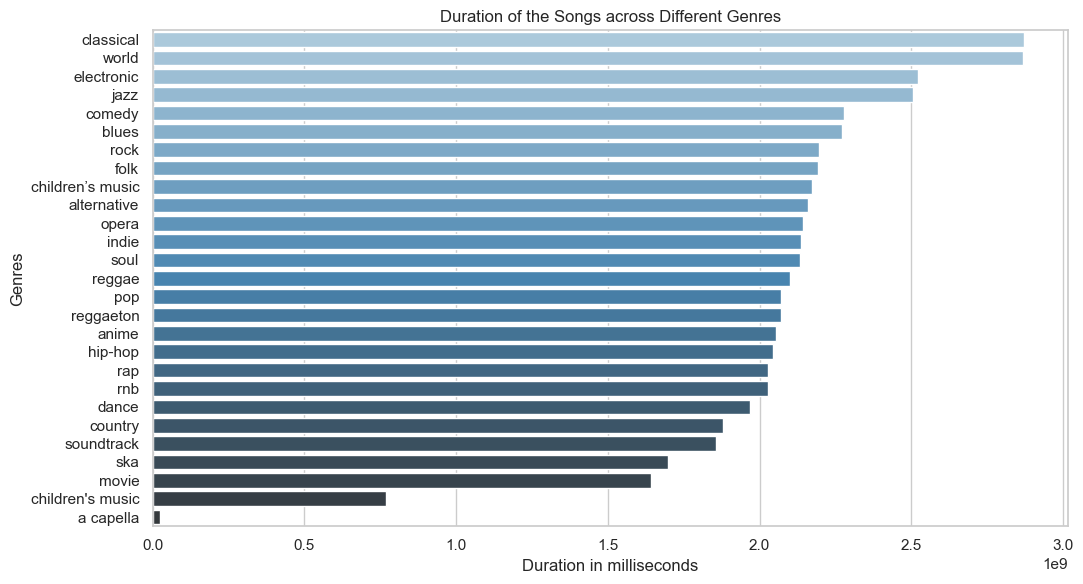

In [144]:
plt.figure(figsize=(11, 6))
plt.title("Duration of the Songs across Different Genres")
sns.barplot(y='genre', x='duration_ms', data=df_sorted, palette='Blues_d')
plt.xlabel("Duration in milliseconds")
plt.ylabel("Genres")

plt.tight_layout()
plt.show()


### Explanation 
Some genres (e.g., "Jazz" or "Classical") may have longer durations due to their structure, while others (e.g., "Pop" or "Hip-Hop") tend to be shorter. Recognizing these patterns allows businesses to cater to audience preferences more effectively.
For example, if users prefer shorter songs in high-energy genre, streaming platforms could push shorter tracks during peak active hours also improving engagement.

## 3. Instrumentalness in Popular Songs

### Business Importance
Instrumentalness reflects the degree to which a song is dominated by instruments rather than vocals. Identifying if instrumental tracks tend to be more popular can help Spotify create instrumental playlists especially for users who prefer background music while working or studying



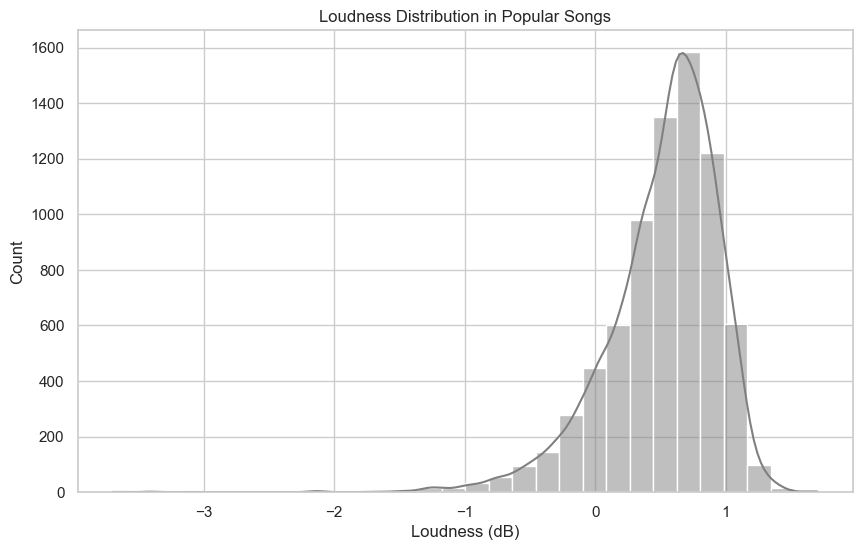

In [139]:
# Distribution plot of loudness in popular songs
plt.figure(figsize=(10,6))
sns.histplot(df[df['popularity'] > 70]['loudness'], bins=30, kde=True, color='Gray')
plt.title('Loudness Distribution in Popular Songs')
plt.xlabel('Loudness (dB)')
plt.ylabel('Count')
plt.show()

### Explanation
- The distribution peaks around 0 dB, indicating that a majority of popular songs are produced to be relatively loud, within the range of 0 to 1 dB.
- There are fewer songs with significantly lower loudness (e.g., below -2 dB), showing that quieter tracks are less common in popular music.
- The right skew in the data indicates that while most tracks hover around the high-loudness mark, there are almost no tracks with loudness greater than 1 dB.

If popular songs tend to have higher average loudness Spotify can factor this into its algorithms for generating high-energy or emotionally intense playlists, this will improve user experience based on mood or setting.

## 4. Relationship Between Danceability and Popularity

### Business Importance 
Understanding how danceability affects a track's popularity can help streaming services and producers create or promote songs that align with listener preferences especially in genres or playlists designed for parties and dance environments.

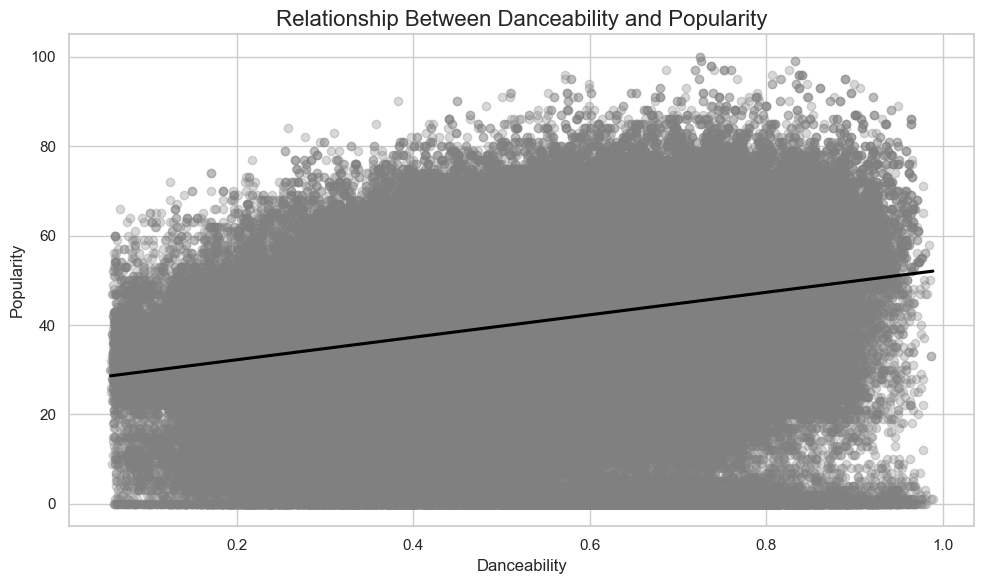

In [156]:
# Setting plot size
plt.figure(figsize=(10, 6))

# Scatter plot with regression line and grey scatter points
sns.regplot(data=df, x='danceability', y='popularity', scatter_kws={'alpha': 0.3, 'color': 'grey'}, line_kws={"color": "Black"})
plt.title('Relationship Between Danceability and Popularity', fontsize=16)
plt.xlabel('Danceability', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

plt.tight_layout()

plt.show()


### Explanation
The scatter plot with regression line shows positive correlation between danceability and popularity. Tracks with higher danceability scores tend to have higher popularity though the relationship is not perfectly linear.
Popularity generally increases with danceability suggesting that listeners tend to prefer more danceable tracks which may be important for creating engaging playlists.
There's still a wide variance in popularity for highly danceable songs, indicating that other factors (such as artist popularity, genre, or marketing) also play significant roles.

## 5. Energy level across genres

### Business Importance
Different genres are associated with distinct energy levels which influence listener mood and activity. Understanding average energy levels for each genre can help music platforms better categorize songs and suggest them for activities like working out or relaxing.

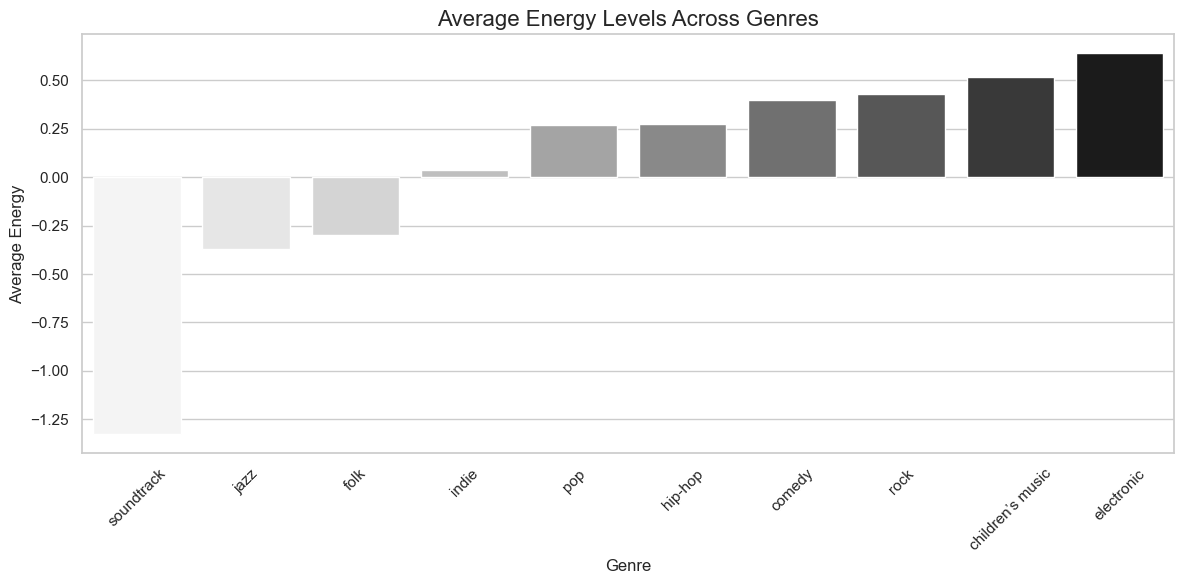

In [158]:
avg_energy_by_genre = filtered_data.groupby('genre')['energy'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_energy_by_genre.index, y=avg_energy_by_genre.values, palette='Greys')
plt.title('Average Energy Levels Across Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Energy', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Explanation 

Understanding the energy levels of different genres is crucial for music platforms. Use these insights to better recommend songs based on user activities or moods. A user looking for relaxing music might be guided towards genres like soundtrack or jazz, while someone wanting a more dynamic experience, such as for exercise or parties, might receive recommendations for electronic or hip-hop genres.

## 6. Danceability and Energy Relationship 

### Business Imortance 

Understanding this relationship will help creating more personalized playlists tailored to user moods and activities increasing engagement. It can also provides insights for artists and producers to craft music that aligns with audience preferences and popular trends, boosting their visibility on the platform.


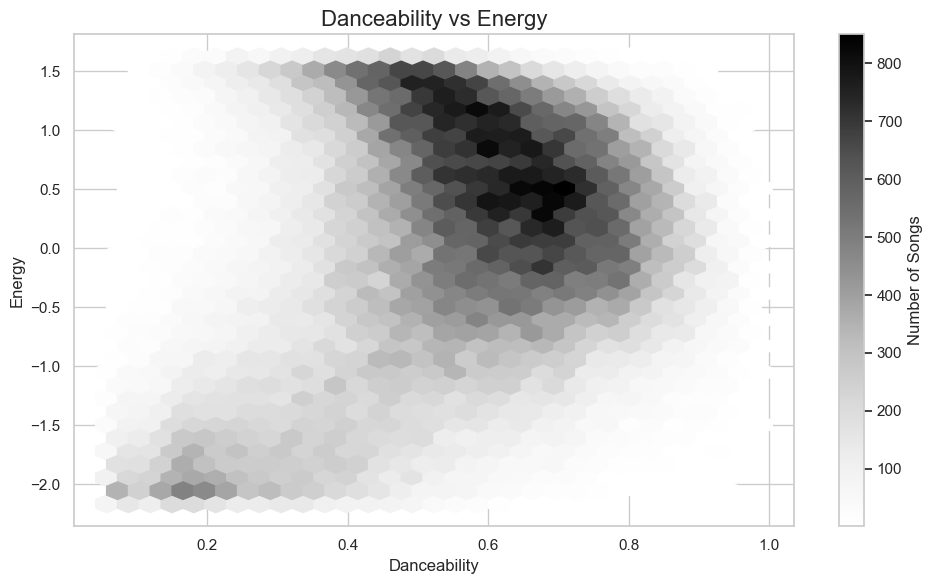

In [134]:
# Hexbin plot for danceability vs energy 
plt.figure(figsize=(10, 6))
plt.hexbin(df['danceability'], df['energy'], gridsize=30, cmap='Greys', mincnt=1)
plt.colorbar(label='Number of Songs')
plt.title('Danceability vs Energy', fontsize=16)
plt.xlabel('Danceability', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.tight_layout()

plt.show()

### Explanation 
- A strong concentration of songs is clustered in the upper-middle region, where danceability ranges between 0.4 and 0.8 and energy between 0.0 and 1.0.
- There are few songs with both very low energy and low danceability, as well as very high energy but low danceability.
- Most tracks seem to exhibit a mid-range balance of both danceability and energy, suggesting that tracks with these characteristics are more common.

By analyzing the relationship between danceability and energy, music platforms can better personalize experiences for their users. Whether it’s helping someone find music to suit their workout or a company choosing the right song for an advertisement, this insight provides valuable guidance for creating effective music recommendations and content strategies.

## Final Discussion and Conclusion
#### Strengths of the Explanatory Data Analysis Pipeline 
- With a few small changes, the same method can be used to learn about different types of content, user preferences, and content aspects.
- Every insight is given in the context of a business, and Spotify gains strategic value through better user engagement, playlist curation, and recommendation systems.
- Focussing on what customers want makes sure that the insights are in line with business goals.
#### Limitations of the Pipeline
- The analysis does a good job of finding many interesting insights, but the dataset is small, and some important features, such as user engagement metrics like skip rates and song completion rates, are left out. 
- This means that the analysis can only look at the features of the songs and not their relationships with user behaviour or preferences. 

#### Insights and Implications for the Business
- Preferences Based on Genre: The analysis shows that some characteristics, like duration, energy, and loudness, are very different between genres. This information can help Spotify make better playlists and song suggestions for users based on the types of music they like.

- Popularity and Danceability: Songs that are more popular tend to have higher danceability scores, especially in pop and electronic music. This means that Spotify could focus on making upbeat playlists that people can dance to, especially for social events or workouts.

- Loudness and Popularity: Songs that are more popular tend to be louder, which could mean that people like upbeat, attention-getting music. This information can be used to make playlists for different moods, like work-out or party playlists that focus on upbeat songs.
#### Data-Driven Recommendations for the Company
- Pay attention to popular music styles: Use popular music styles like Hip-Hop and Pop to your advantage by making playlists that are specific to these styles, promoting new music in these styles, and making them the focus of campaigns. But you might also want to promote niche genres to keep users interested.

- Make sure your playlists are danceable and full of energy. For high-energy or social settings, make sure your playlists are danceable. On the other hand, lower-energy genres or tracks could be promoted for playlists that help people relax or concentrate, depending on their activities and moods.

- Add More Personalisation: To make recommendations more relevant to each user, you might want to add more information like their demographics or preferences for example, their favourite music genres and listening habits. This could make users happier and more likely to stick around because they would get content that is tailored to their tastes and habits.

### Conclusion 
The explanatory data analysis pipeline gives useful information that can be used to make Spotify's recommendation algorithms, user experience, and playlist curation better. Spotify can make its music better for different activities, moods, and tastes by focussing on things like how danceable, acoustic, loud, and instrumental it is. The business can also take advantage of new trends and genre-specific tastes to make users more interested and satisfied.

But Spotify should think about adding user behaviour data (like skip rates and listening time) and doing a more dynamic analysis over time to make the analysis even better. This would give us a fuller picture of how user tastes change over time and help Spotify better adapt to these new trends.